# Tutorial 2

In this tutorial 2. <br>
In this we will be learning about how to create a <h3> Convulational Neural Network , CNN </h3> model to predict the class of image belongs to , of <h3> Fashion MNIST</h3> dataset by Tensorflow

### Why use CNN ?
<br>
CNN makes sures that we get pattern recognizable throughout the image,whether the image is vertical/horizontal/flipped or whatever. If , for example , flower is present in image,then we should be able to predict flower in corner, centre ,at edge or any other position. We donot stick with the fixed pattern. But , the pattern throught image of object.
<br> CNN mostly used for imaging and video stuff like detection,etc
<br> 


### Terms to get familiar with 
<li> CNN : A network in which at least one convulational layer is present. A typical CNN has other layers like pooling layers and dense layers.
<li> Convulations :Process of applying kernal ("filter") to an image
<li> Kernel/Filter : A matrix which is smaller than input , used to transform the inputs into chunks
<li> Padding : Adding pixels of some values , usually 0's around image
<li> Pooling : Process of reducing the size of the image through downsampling. Several types of pooling available like average,maxpooling is mostly used.
<li> stride : Number of pixels to slide the kernel for next move.
<li> Downsampling : Act of reducing the size of the image
    

In [1]:
#lets import libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# lets import our data now
(trainX, trainY) , (testX,testY) = fashion_mnist.load_data()

In [3]:
#how many images are there in trainX ? 
# what is the shape of those images
trainX.shape 

(60000, 28, 28)

In [4]:
testX.shape

(10000, 28, 28)

In [5]:
#we need to shape our training data 
''' We know that our images are grayscale 28x28 images'''
trainX_reshaped = np.reshape(trainX,(60000,28,28,1))
print(trainX_reshaped.shape)

(60000, 28, 28, 1)


In [6]:
testX_reshaped = np.reshape(testX,(10000,28,28,1))
print(testX_reshaped.shape)

(10000, 28, 28, 1)


##  Step 1: Architecture of CNN model
Architecture is overall design of model

In [7]:
from tensorflow.keras.layers import Dense ,Conv2D , MaxPool2D , Flatten ,Dropout 
from tensorflow.keras.models import Sequential

cnn_model = Sequential()
cnn_model.add(Conv2D(input_shape=(28,28,1) ,kernel_size=(2,2) , filters=16 , activation="relu" ))
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=64,kernel_size=(2,2),activation="relu"))
cnn_model.add(MaxPool2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(units=512 ,activation="relu"))
cnn_model.add(Dense(units=64 ,activation="relu"))
cnn_model.add(Dropout(0.1))
cnn_model.add(Dense(units=10,activation="softmax"))

print(" CNN Model summary : \n" , cnn_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        4160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1180160   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3

##  Step 2 : Compile Model

In [8]:
cnn_model.compile(loss="sparse_categorical_crossentropy" , optimizer = "adam" , metrics=["accuracy"])

## Step 3 : Fit/Train Model

In [9]:
epochs = 20
histroy = cnn_model.fit(trainX_reshaped,trainY , epochs=epochs)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7295 - accuracy: 0.8016
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3556 - accuracy: 0.8725
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8926
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2608 - accuracy: 0.9046
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2334 - accuracy: 0.9136
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2082 - accuracy: 0.9220
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1889 - accuracy: 0.9301
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1680 - accuracy: 0.9381
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1526 - accuracy: 0.9436
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.144

### You can see clearly that by using few CNN concepts ,we are able to get accuracy aeound 98% in just 20 epochs.

## Step 4 : Evaluate / Predict on Test data

In [10]:
evaluations =cnn_model.evaluate(testX_reshaped,testY)

313/313 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.9046


In [11]:
print("Accuracy on test data(unseen images to cnn model) : " , evaluations[1])
print("Loss : ", evaluations[0])

Accuracy on test data(unseen images to cnn model) :  0.9046000242233276
Loss :  0.583828866481781


In [12]:
acc=histroy.history["accuracy"]
len(acc)

20

In [13]:
acc = list(acc)
epochs = [ i for i in range(20)]

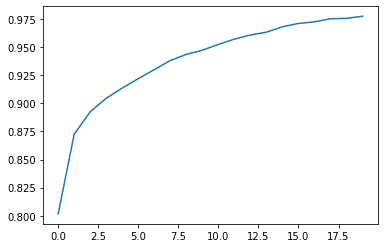

In [14]:
plt.plot(epochs,acc)

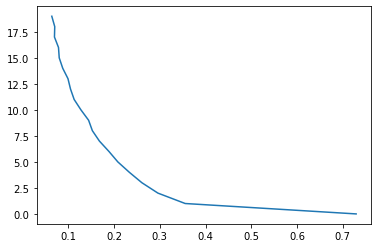

In [15]:
plt.plot(histroy.history["loss"] , epochs)

# Thank You !